# Environment Setting

In [1]:
IN_COLAB = False

try:
  import google.colab
  IN_COLAB = True
except:
  pass

if IN_COLAB == True:
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/Tesi_GDrive
  PROJECT_PATH = '/content/gdrive/MyDrive/Tesi_GDrive'
  #!ls
else:
  %cd /Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive
  PROJECT_PATH = '/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive'

import warnings
import pickle
import sys
import os

if IN_COLAB == True:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))
else:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from keras.models import Sequential, Model
from keras.layers import Dense, Lambda
from keras.layers import Activation
from keras.activations import exponential, relu
from keras import backend as K
import tensorflow as tf
#from tensorflow.keras.layers import Input, Layer, InputSpec, Reshape
#from tensorflow.keras import initializers
#from tensorflow.keras.optimizers import Adam
tf.config.run_functions_eagerly(True)
from scipy.optimize import minimize, differential_evolution

#from pkl import store_data, load_data
#from functions.compressor import compress
from functions.compressor_param import compress_2
from functions.mapping import sub2ind3d, ind2sub, ind2sub3d
from functions.policy_functions import policy_evaluation, policy_improvement, policy_iteration, policy_optim, value_iteration


import random
from collections import defaultdict

import time



print("Libraries imported")

/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive


2023-06-04 18:00:24.638866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Libraries imported


## Data Loading

In [19]:
df_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/df_partitioned.csv')
df = pd.read_csv(df_path)

T_norm = np.load(os.path.join(PROJECT_PATH, 'MDP_data/kmeans/T_cluster_df_norm.npy'))
R_norm = np.load(os.path.join(PROJECT_PATH, 'MDP_data/kmeans/R_norm_kmeans.npy'))
T_st = np.load(os.path.join(PROJECT_PATH, 'MDP_data/kmeans/T_cluster_df_st.npy'))
R_st = np.load(os.path.join(PROJECT_PATH, 'MDP_data/kmeans/R_st_kmeans6.npy'))

T_group = [T_norm, T_st]
T_group_name = ['T_norm', 'T_st']
R_group = [R_norm, R_st]

cluster_kmeans_norm_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clustered/kmeans_norm.csv')
cluster_kmeans_st_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clustered/kmeans_st.csv')
cluster_kmeans_norm = pd.read_csv(cluster_kmeans_norm_path)
cluster_kmeans_st = pd.read_csv(cluster_kmeans_st_path)

## Policy Iteration

p_eval convergenza raggiunta
p_eval convergenza raggiunta
p_iteration convergenza raggiunta
policy:  [1. 1. 2. 1. 1.]
value:  [-0.34854682 -0.29699566 -0.31737617 -0.31493697 -0.30818466]


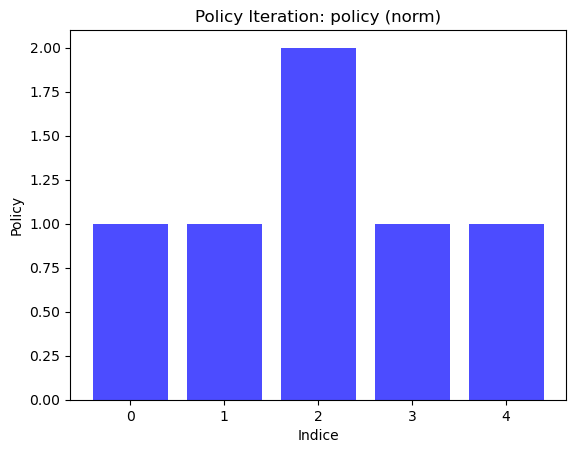

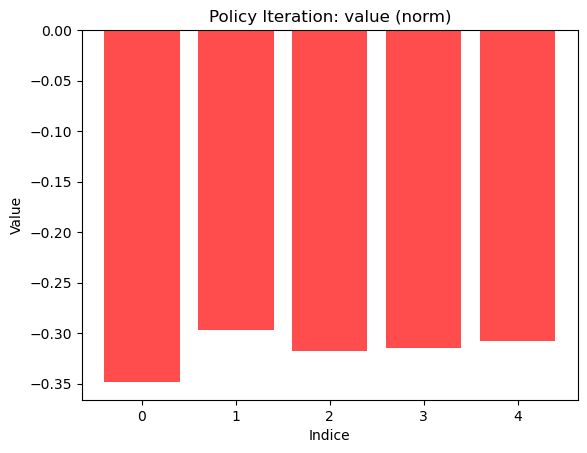

In [12]:
T = T_norm
R = R_norm

policy, value = policy_iteration(T=T, R=R, gamma=0.99)
policy = policy.reshape(-1)
print("policy: ", policy)
print("value: ", value)

# Numero di elementi sull'asse x
num_elements = len(policy)

# Crea un array di indici degli elementi sull'asse x
indices = np.arange(num_elements)

# Crea il primo istogramma per la policy
plt.bar(indices, policy, align='center', alpha=0.7, color='blue')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Policy')
plt.title('Policy Iteration: policy (norm)')

# Mostra il primo istogramma
plt.show()

# Crea il secondo istogramma per il value
plt.bar(indices, value, align='center', alpha=0.7, color='red')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Value')
plt.title('Policy Iteration: value (norm)')

# Mostra il secondo istogramma
plt.show()

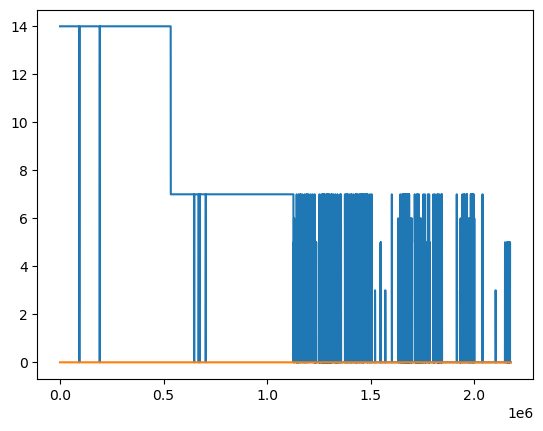

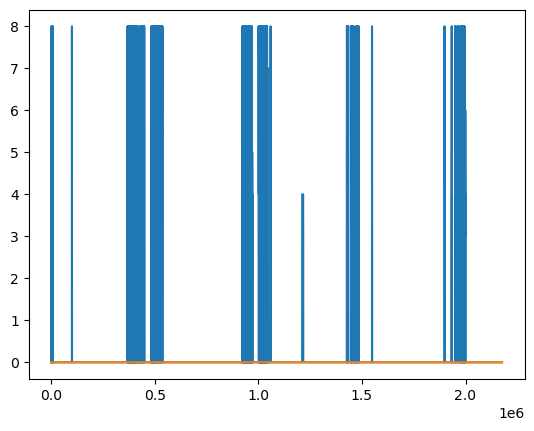

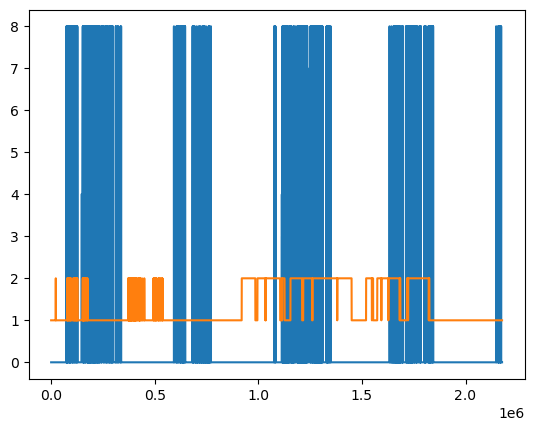

In [33]:
actions_by_policy = []
for i in range(len(policy)):
    ret = ind2sub3d(policy[i], (16,10,10))
    actions_by_policy.append(ret)

print("policy: ", policy)
print("len(policy): ", len(policy))
print("actions_by_policy: ", actions_by_policy)
print("len(actions_by_policy): ", len(actions_by_policy))

a1_intervals = [0.0, 7.1671, 14.3342, 21.5013, 28.6683, 35.8354, 43.0025, 50.1696, 57.3367, 64.5038, 71.6709, 78.8379, 86.005, 93.1721, 100.3392, 107.5063]
a2_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]
a3_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]

abp1 = []
abp2 = []
abp3 = []

for i in range(len(actions_by_policy)):
    abp1.append(actions_by_policy[i][0])
    abp2.append(actions_by_policy[i][1])
    abp3.append(actions_by_policy[i][2])


a1_discrete_plot = []
a2_discrete_plot = []
a3_discrete_plot = []

for i in range(df.shape[0]):
    a1_discrete_plot.append(a1_intervals.index(df.iloc[i]['a1_discrete']))
    a2_discrete_plot.append(a2_intervals.index(df.iloc[i]['a2_discrete']))
    a3_discrete_plot.append(a3_intervals.index(df.iloc[i]['a3_discrete']))


plt.plot(a1_discrete_plot)
policy_plot_1 = []
for i in range(df.shape[0]):
    policy_plot_1.append(abp1[cluster_kmeans_norm['cluster'][i]])
plt.plot(policy_plot_1)
plt.show()

plt.plot(a2_discrete_plot)  
policy_plot_2 = []
for i in range(df.shape[0]):
    policy_plot_2.append(abp2[cluster_kmeans_norm['cluster'][i]])
plt.plot(policy_plot_2)
plt.show()

plt.plot(a3_discrete_plot)
policy_plot_3 = []
for i in range(df.shape[0]):
    policy_plot_3.append(abp3[cluster_kmeans_norm['cluster'][i]])
plt.plot(policy_plot_3)
plt.show()

p_eval convergenza raggiunta
p_eval convergenza raggiunta
p_eval convergenza raggiunta
p_iteration convergenza raggiunta
policy:  [ 612.   84. 1134.  270.  135. 1138.]
value:  [28.45149008 35.76869964 34.43884115 34.38175382 35.77062473  6.65623333]


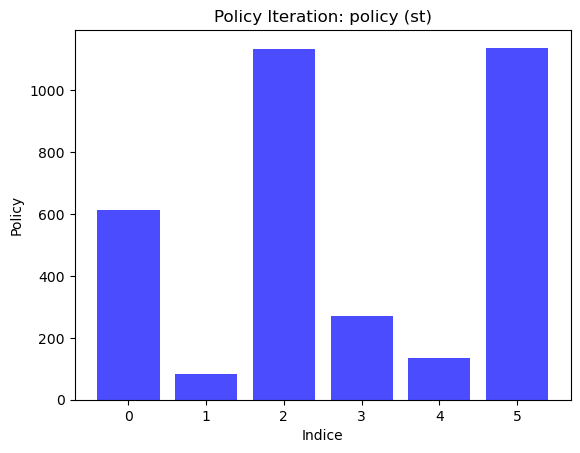

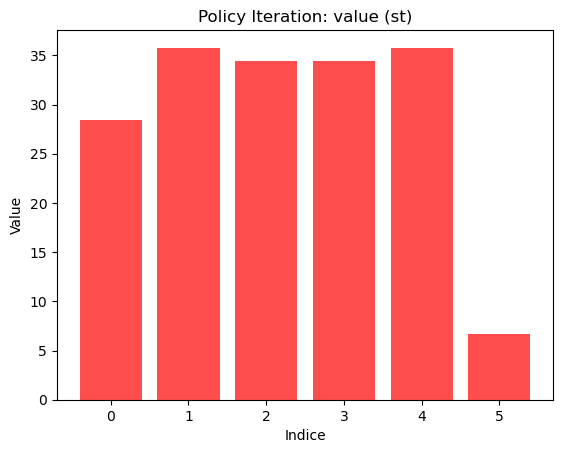

In [34]:
T = T_st
R = R_st

policy, value = policy_iteration(T=T, R=R, gamma=0.99)
policy = policy.reshape(-1)
print("policy: ", policy)
print("value: ", value)

# Numero di elementi sull'asse x
num_elements = len(policy)

# Crea un array di indici degli elementi sull'asse x
indices = np.arange(num_elements)

# Crea il primo istogramma per la policy
plt.bar(indices, policy, align='center', alpha=0.7, color='blue')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Policy')
plt.title('Policy Iteration: policy (st)')

# Mostra il primo istogramma
plt.show()

# Crea il secondo istogramma per il value
plt.bar(indices, value, align='center', alpha=0.7, color='red')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Value')
plt.title('Policy Iteration: value (st)')

# Mostra il secondo istogramma
plt.show()

policy:  [ 612.   84. 1134.  270.  135. 1138.]
len(policy):  6
actions_by_policy:  [(6.0, 1.0, 2.0), (0.0, 8.0, 4.0), (11.0, 3.0, 4.0), (2.0, 7.0, 0.0), (1.0, 3.0, 5.0), (11.0, 3.0, 8.0)]
len(actions_by_policy):  6


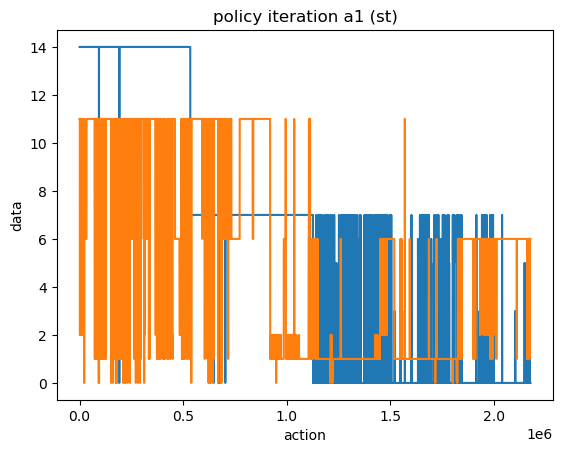

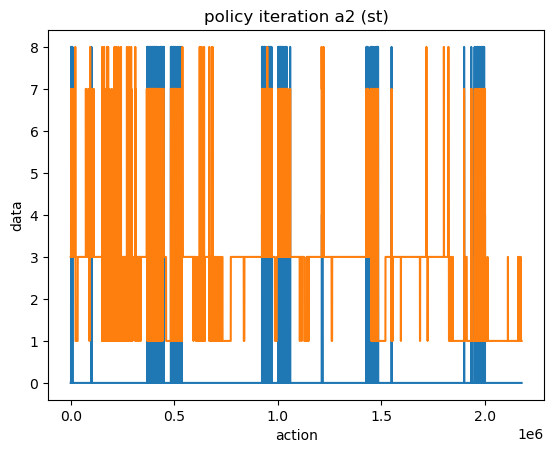

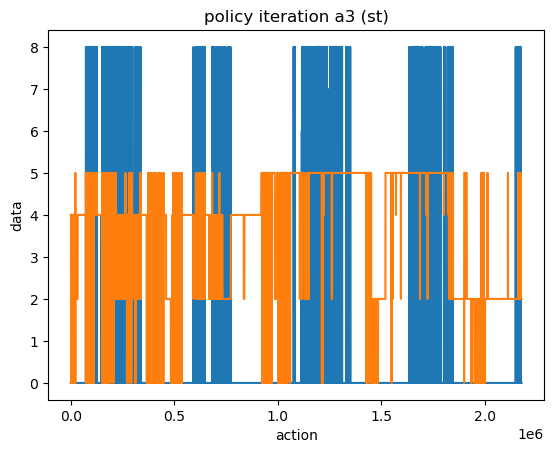

In [37]:
actions_by_policy = []
for i in range(len(policy)):
    ret = ind2sub3d(policy[i], (16,10,10))
    actions_by_policy.append(ret)

print("policy: ", policy)
print("len(policy): ", len(policy))
print("actions_by_policy: ", actions_by_policy)
print("len(actions_by_policy): ", len(actions_by_policy))

a1_intervals = [0.0, 7.1671, 14.3342, 21.5013, 28.6683, 35.8354, 43.0025, 50.1696, 57.3367, 64.5038, 71.6709, 78.8379, 86.005, 93.1721, 100.3392, 107.5063]
a2_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]
a3_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]

abp1 = []
abp2 = []
abp3 = []

for i in range(len(actions_by_policy)):
    abp1.append(actions_by_policy[i][0])
    abp2.append(actions_by_policy[i][1])
    abp3.append(actions_by_policy[i][2])


a1_discrete_plot = []
a2_discrete_plot = []
a3_discrete_plot = []

for i in range(df.shape[0]):
    a1_discrete_plot.append(a1_intervals.index(df.iloc[i]['a1_discrete']))
    a2_discrete_plot.append(a2_intervals.index(df.iloc[i]['a2_discrete']))
    a3_discrete_plot.append(a3_intervals.index(df.iloc[i]['a3_discrete']))


plt.plot(a1_discrete_plot)
policy_plot_1 = []
for i in range(df.shape[0]):
    policy_plot_1.append(abp1[cluster_kmeans_st['cluster'][i]])
plt.plot(policy_plot_1)
plt.xlabel('action')
plt.ylabel('data')
plt.title('policy iteration a1 (st)')
plt.show()

plt.plot(a2_discrete_plot)  
policy_plot_2 = []
for i in range(df.shape[0]):
    policy_plot_2.append(abp2[cluster_kmeans_st['cluster'][i]])
plt.plot(policy_plot_2)
plt.xlabel('action')
plt.ylabel('data')
plt.title('policy iteration a2 (st)')
plt.show()

plt.plot(a3_discrete_plot)
policy_plot_3 = []
for i in range(df.shape[0]):
    policy_plot_3.append(abp3[cluster_kmeans_st['cluster'][i]])
plt.plot(policy_plot_3)
plt.xlabel('action')
plt.ylabel('data')
plt.title('policy iteration a3 (st)')
plt.show()

## Value Iteration

value [[ 456]
 [ 198]
 [ 770]
 [1055]
 [ 176]]
v_iteration convergenza raggiunta
policy:  [1138. 1138. 1134.   81.   72.]
value:  [ 656.2396445  1022.7833382   748.55600769 1022.73005069  610.74645149]


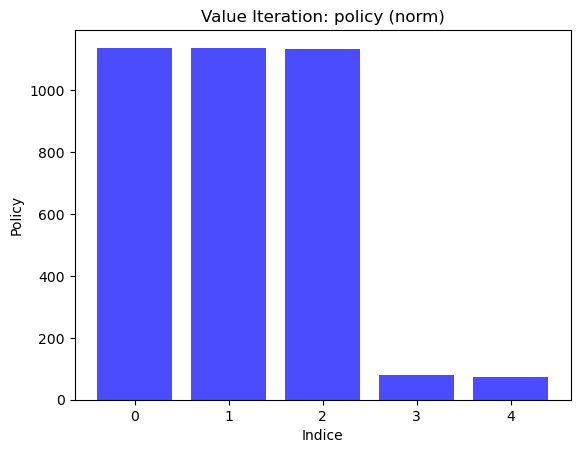

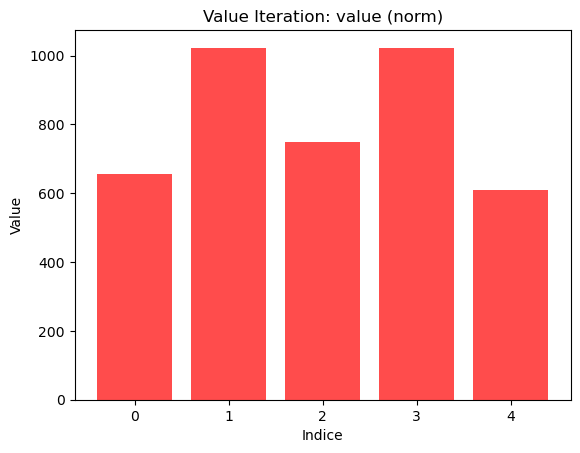

In [38]:
T = T_norm
R = R_norm

policy, value = value_iteration(T=T, R=R, gamma=0.99)
policy = policy.reshape(-1)
print("policy: ", policy)
print("value: ", value)

# Numero di elementi sull'asse x
num_elements = len(policy)

# Crea un array di indici degli elementi sull'asse x
indices = np.arange(num_elements)

# Crea il primo istogramma per la policy
plt.bar(indices, policy, align='center', alpha=0.7, color='blue')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Policy')
plt.title('Value Iteration: policy (norm)')

# Mostra il primo istogramma
plt.show()

# Crea il secondo istogramma per il value
plt.bar(indices, value, align='center', alpha=0.7, color='red')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Value')
plt.title('Value Iteration: value (norm)')

# Mostra il secondo istogramma
plt.show()


policy:  [1138. 1138. 1134.   81.   72.]
len(policy):  5
actions_by_policy:  [(11.0, 3.0, 8.0), (11.0, 3.0, 8.0), (11.0, 3.0, 4.0), (0.0, 8.0, 1.0), (0.0, 7.0, 2.0)]
len(actions_by_policy):  5


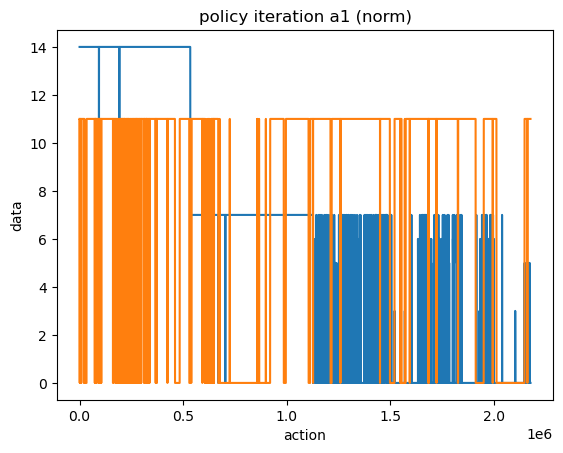

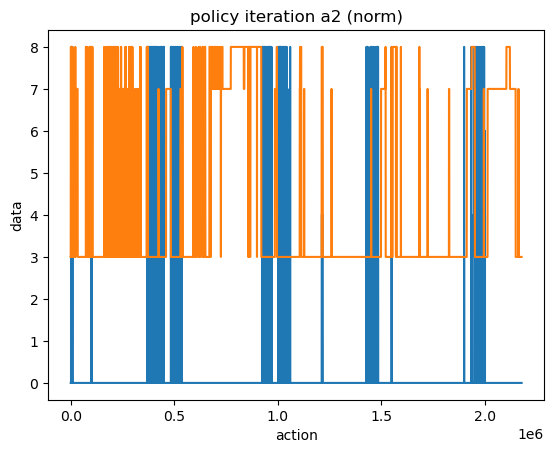

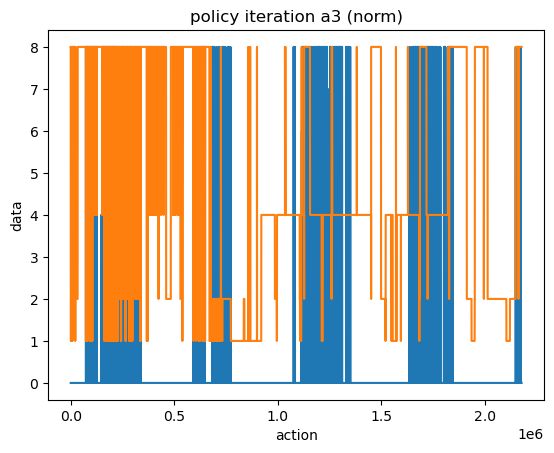

In [39]:
actions_by_policy = []
for i in range(len(policy)):
    ret = ind2sub3d(policy[i], (16,10,10))
    actions_by_policy.append(ret)

print("policy: ", policy)
print("len(policy): ", len(policy))
print("actions_by_policy: ", actions_by_policy)
print("len(actions_by_policy): ", len(actions_by_policy))

a1_intervals = [0.0, 7.1671, 14.3342, 21.5013, 28.6683, 35.8354, 43.0025, 50.1696, 57.3367, 64.5038, 71.6709, 78.8379, 86.005, 93.1721, 100.3392, 107.5063]
a2_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]
a3_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]

abp1 = []
abp2 = []
abp3 = []

for i in range(len(actions_by_policy)):
    abp1.append(actions_by_policy[i][0])
    abp2.append(actions_by_policy[i][1])
    abp3.append(actions_by_policy[i][2])


a1_discrete_plot = []
a2_discrete_plot = []
a3_discrete_plot = []

for i in range(df.shape[0]):
    a1_discrete_plot.append(a1_intervals.index(df.iloc[i]['a1_discrete']))
    a2_discrete_plot.append(a2_intervals.index(df.iloc[i]['a2_discrete']))
    a3_discrete_plot.append(a3_intervals.index(df.iloc[i]['a3_discrete']))


plt.plot(a1_discrete_plot)
policy_plot_1 = []
for i in range(df.shape[0]):
    policy_plot_1.append(abp1[cluster_kmeans_norm['cluster'][i]])
plt.plot(policy_plot_1)
plt.xlabel('action')
plt.ylabel('data')
plt.title('value iteration a1 (norm)')
plt.show()

plt.plot(a2_discrete_plot)  
policy_plot_2 = []
for i in range(df.shape[0]):
    policy_plot_2.append(abp2[cluster_kmeans_norm['cluster'][i]])
plt.plot(policy_plot_2)
plt.xlabel('action')
plt.ylabel('data')
plt.title('value iteration a2 (norm)')
plt.show()

plt.plot(a3_discrete_plot)
policy_plot_3 = []
for i in range(df.shape[0]):
    policy_plot_3.append(abp3[cluster_kmeans_norm['cluster'][i]])
plt.plot(policy_plot_3)
plt.xlabel('action')
plt.ylabel('data')
plt.title('value iteration a3 (norm)')
plt.show()

value [[ 732]
 [ 295]
 [ 843]
 [ 933]
 [ 102]
 [1204]]
v_iteration convergenza raggiunta
policy:  [ 486.  169. 1134.  270.  135. 1138.]
value:  [1157.38855748 1156.88351659 1157.95557221 1156.43544494 1157.82431586
 1145.78373167]


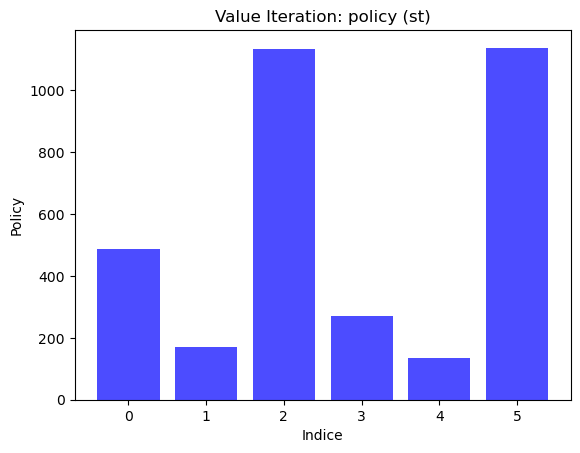

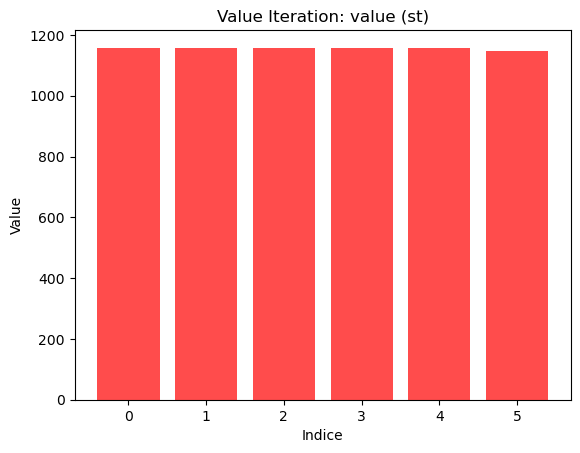

In [40]:
T = T_st
R = R_st

policy, value = value_iteration(T=T, R=R, gamma=0.99)
policy = policy.reshape(-1)
print("policy: ", policy)
print("value: ", value)

# Numero di elementi sull'asse x
num_elements = len(policy)

# Crea un array di indici degli elementi sull'asse x
indices = np.arange(num_elements)

# Crea il primo istogramma per la policy
plt.bar(indices, policy, align='center', alpha=0.7, color='blue')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Policy')
plt.title('Value Iteration: policy (st)')

# Mostra il primo istogramma
plt.show()

# Crea il secondo istogramma per il value
plt.bar(indices, value, align='center', alpha=0.7, color='red')
plt.xticks(indices, indices)
plt.xlabel('Indice')
plt.ylabel('Value')
plt.title('Value Iteration: value (st)')

# Mostra il secondo istogramma
plt.show()

policy:  [ 486.  169. 1134.  270.  135. 1138.]
len(policy):  6
actions_by_policy:  [(4.0, 8.0, 6.0), (1.0, 6.0, 9.0), (11.0, 3.0, 4.0), (2.0, 7.0, 0.0), (1.0, 3.0, 5.0), (11.0, 3.0, 8.0)]
len(actions_by_policy):  6


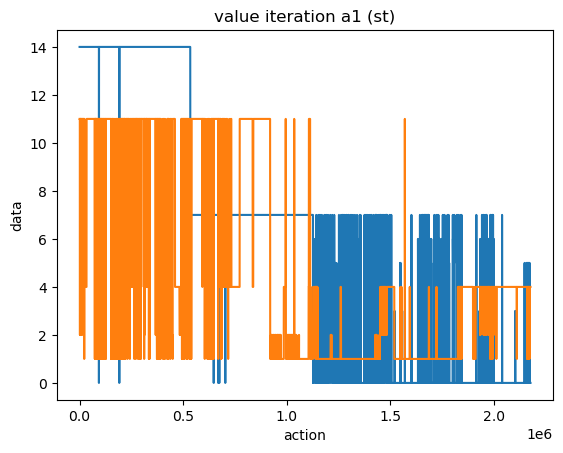

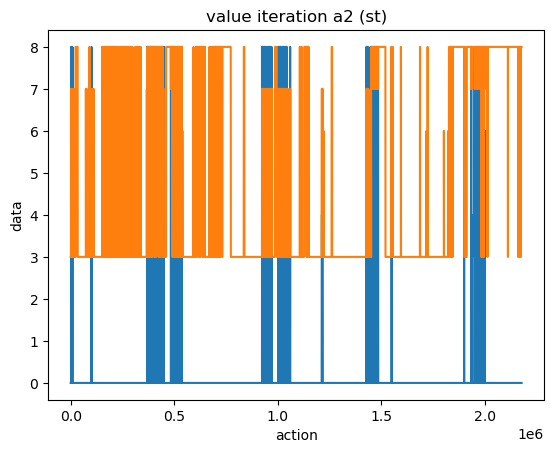

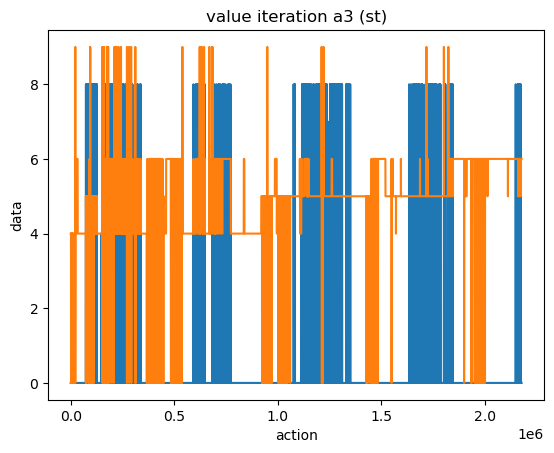

In [41]:
actions_by_policy = []
for i in range(len(policy)):
    ret = ind2sub3d(policy[i], (16,10,10))
    actions_by_policy.append(ret)

print("policy: ", policy)
print("len(policy): ", len(policy))
print("actions_by_policy: ", actions_by_policy)
print("len(actions_by_policy): ", len(actions_by_policy))

a1_intervals = [0.0, 7.1671, 14.3342, 21.5013, 28.6683, 35.8354, 43.0025, 50.1696, 57.3367, 64.5038, 71.6709, 78.8379, 86.005, 93.1721, 100.3392, 107.5063]
a2_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]
a3_intervals = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]

abp1 = []
abp2 = []
abp3 = []

for i in range(len(actions_by_policy)):
    abp1.append(actions_by_policy[i][0])
    abp2.append(actions_by_policy[i][1])
    abp3.append(actions_by_policy[i][2])


a1_discrete_plot = []
a2_discrete_plot = []
a3_discrete_plot = []

for i in range(df.shape[0]):
    a1_discrete_plot.append(a1_intervals.index(df.iloc[i]['a1_discrete']))
    a2_discrete_plot.append(a2_intervals.index(df.iloc[i]['a2_discrete']))
    a3_discrete_plot.append(a3_intervals.index(df.iloc[i]['a3_discrete']))


plt.plot(a1_discrete_plot)
policy_plot_1 = []
for i in range(df.shape[0]):
    policy_plot_1.append(abp1[cluster_kmeans_st['cluster'][i]])
plt.plot(policy_plot_1)
plt.xlabel('action')
plt.ylabel('data')
plt.title('value iteration a1 (st)')
plt.show()

plt.plot(a2_discrete_plot)  
policy_plot_2 = []
for i in range(df.shape[0]):
    policy_plot_2.append(abp2[cluster_kmeans_st['cluster'][i]])
plt.plot(policy_plot_2)
plt.xlabel('action')
plt.ylabel('data')
plt.title('value iteration a2 (st)')
plt.show()

plt.plot(a3_discrete_plot)
policy_plot_3 = []
for i in range(df.shape[0]):
    policy_plot_3.append(abp3[cluster_kmeans_st['cluster'][i]])
plt.plot(policy_plot_3)
plt.xlabel('action')
plt.ylabel('data')
plt.title('value iteration a3 (st)')
plt.show()

In [3]:
def converti_indici_tridimensionali(indici, dimensioni):
    coordinate = []
    if isinstance(indici, int):
        indici = [indici]

    for indice in indici:
        coordinate_correnti = []
        for dimensione in reversed(dimensioni):
            coordinate_correnti.insert(0, indice % dimensione)
            indice //= dimensione
        coordinate.append(coordinate_correnti)
    
    return coordinate

In [6]:
converti_indici_tridimensionali([1, 2, 612, 84, 1134, 270, 135, 1138], (16,10,10))

[[0, 0, 1],
 [0, 0, 2],
 [6, 1, 2],
 [0, 8, 4],
 [11, 3, 4],
 [2, 7, 0],
 [1, 3, 5],
 [11, 3, 8]]